<a href="https://colab.research.google.com/github/zubeydeulukok/CNN_Projects/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authentication steps for **Colab**:

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Installation and Controls

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17364354892576302073
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2125668934032224776
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

**Drive da dosya konumlandırmayı yapma işlemleri**

In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

/bin/bash: google-drive-ocamlfuse: command not found
drive  sample_data


In [4]:
!ls drive

MyDrive


In [5]:
import os 
os.chdir("/content/drive/My Drive")
!pwd

/content/drive/My Drive


In [ ]:
# !ls

In [6]:
os.chdir("/content/drive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN")

In [7]:
!ls

CNN_1.ipynb  drive  fashion_mnist1.h5  Fashion_MNIST.ipynb


In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


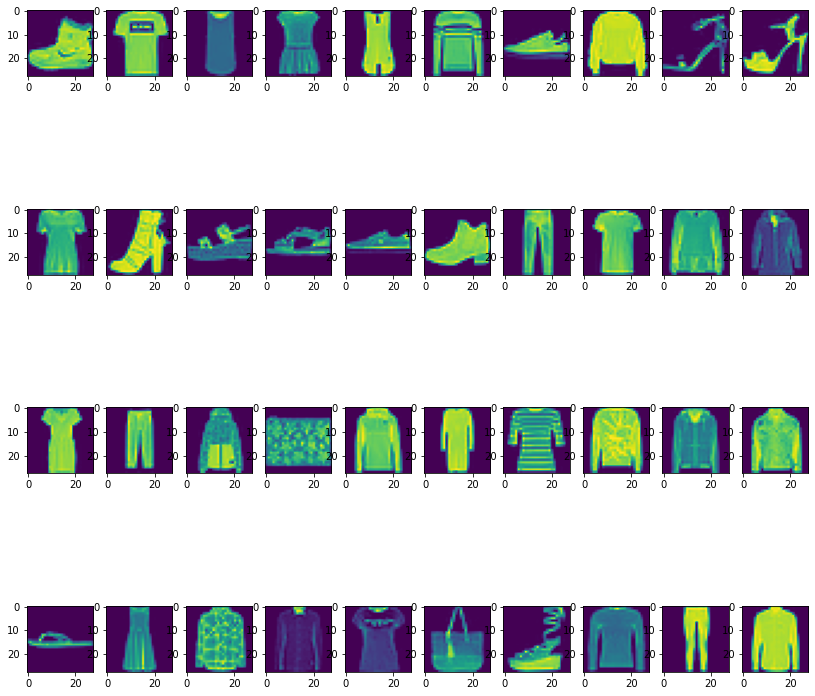

In [11]:
plt.figure(figsize=(14,14))
x, y = 10, 4 # display 40 images
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

In [12]:
# The names of fashion mnist labels
fashion_mnist_labels = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'])

In [13]:
# the number of classes
len(fashion_mnist_labels)

10

In [14]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Build the Model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_16 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_17 (Bat  (None, 11, 11, 64)     

# Train the Model

In [ ]:
batch_size = 64
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy', 'Recall', 'AUC', keras.metrics.PrecisionAtRecall(recall=0.8)])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
844/844 [==============================] - 8s 8ms/step - loss: 0.6767 - accuracy: 0.7564 - recall: 0.6922 - auc: 0.9727 - precision_at_recall_12: 0.7159 - val_loss: 0.4358 - val_accuracy: 0.8400 - val_recall: 0.8022 - val_auc: 0.9876 - val_precision_at_recall_12: 0.8718
Epoch 2/20
844/844 [==============================] - 6s 8ms/step - loss: 0.4537 - accuracy: 0.8342 - recall: 0.7967 - auc: 0.9867 - precision_at_recall_12: 0.8674 - val_loss: 0.3896 - val_accuracy: 0.8507 - val_recall: 0.8268 - val_auc: 0.9906 - val_precision_at_recall_12: 0.8990
Epoch 3/20
844/844 [==============================] - 6s 8ms/step - loss: 0.4011 - accuracy: 0.8529 - recall: 0.8241 - auc: 0.9893 - precision_at_recall_12: 0.8997 - val_loss: 0.3612 - val_accuracy: 0.8643 - val_recall: 0.8438 - val_auc: 0.9912 - val_precision_at_recall_12: 0.9160
Epoch 4/20
844/844 [==============================] - 6s 8ms/step - loss: 0.3717 - accuracy: 0.8636 - recall: 0.8373 - auc: 0.9907 - precision_at_recall_1

# Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2729301452636719
Test accuracy: 0.9075000286102295


In [ ]:
# save model permanently and check
model.save('/content/drive/MyDrive/BTK-Keras ile derin öğrenmeye giriş/CNN/fashion_mnist1.h5')

Let's pull the weights of the previously trained model from the fashion_mnist1.h5 file and preprocess the input images according to the model input!

In [15]:
from keras.models import load_model
root = '/content/drive/MyDrive/BTK-Keras ile derin öğrenmeye giriş/CNN/'
model = load_model(root + 'fashion_mnist1.h5')

In [16]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [19]:
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255
    return image.reshape(1,28,28,1)

1/1 [==============================] - 0s 15ms/step


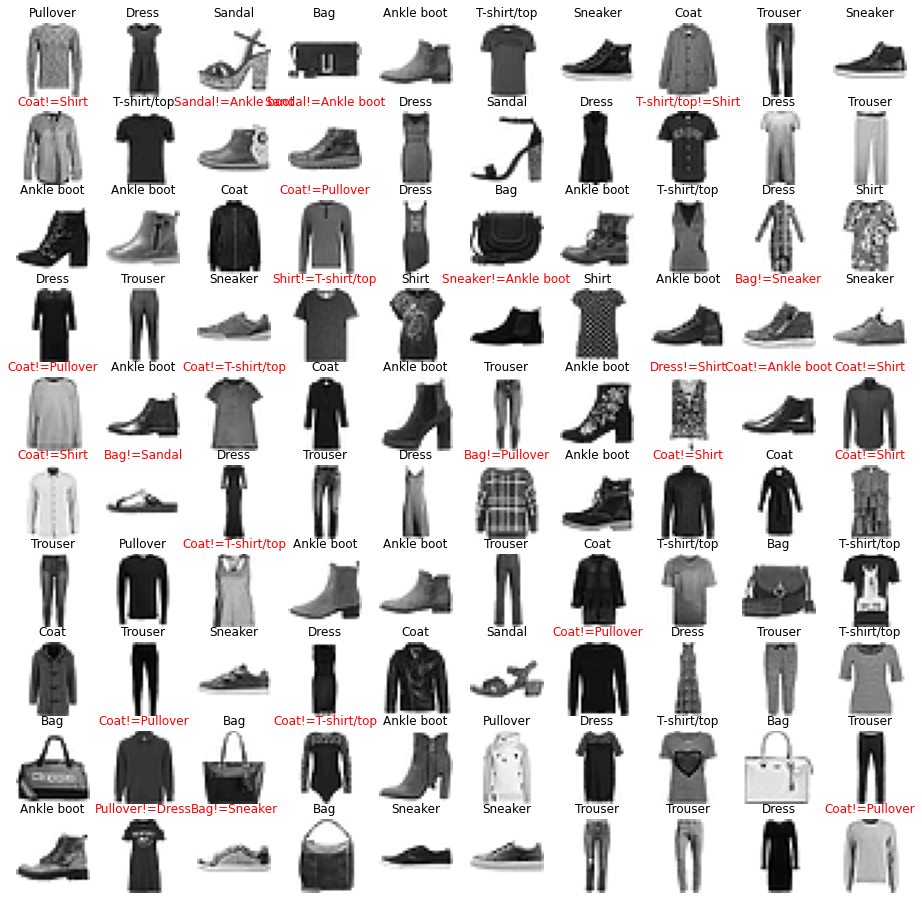

In [27]:
plt.figure(figsize=(16,16))

right = 0
mistake = 0
predictionNum = 100

for i in range(predictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    pred = model.predict(data, batch_size=1) 

    bestnum = 0.0
    bestclass = 0
    for n in range(10):
        if bestnum < pred[0][n]:
            bestnum = pred[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #predicted class != actual class
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1

In [28]:
plt.show()
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')

Doğru tahminlerin sayısı: 75
Hata sayısı: 25
Doğru tahmin oranı: 75.0 %
